In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from spectral_cube import SpectralCube
from astropy.wcs import WCS

In [2]:
def getImgStats(img):
    v = list(np.percentile(img, [10, 25, 50, 75, 90, 99]))
    s = f"avg:\t{np.mean(img)}"
    s += f"\nstd:\t{np.std(img)}"
    s += f"\nmin:\t{np.min(img)}"
    s += f"\n10:\t{v[0]}"
    s += f"\n25:\t{v[1]}"
    s += f"\n50:\t{v[2]}"
    s += f"\n75:\t{v[3]}"
    s += f"\n90:\t{v[4]}"
    s += f"\n99:\t{v[5]}"
    s += f"\nmax:\t{np.max(img)}\n"
    return s

(302, 118, 287)


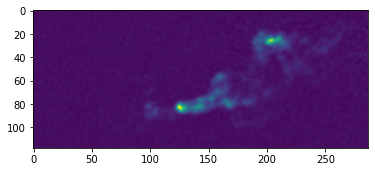

In [3]:
cube_hdu = fits.open('./LAII.fits')
data = cube_hdu[0].data
print(data.shape)
plt.figure()
plt.imshow(data[200])
plt.show()

(302, 118, 287)


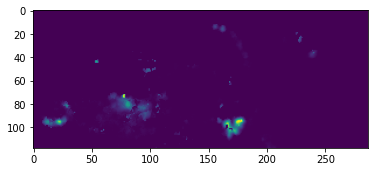

In [4]:
modelcube_hdu = fits.open('./model_LAII.fits')
modeldata = modelcube_hdu[0].data
print(modeldata.shape)
plt.figure()
plt.imshow(modeldata[200])
plt.show()

(302, 118, 287)
avg:	0.5195488333702087
std:	0.19963054358959198
min:	0.0
10:	0.372055071592331
25:	0.45458853244781494
50:	0.5208827257156372
75:	0.6043891310691833
90:	0.7309833407402038
99:	1.0348286819457988
max:	1.3599544763565063



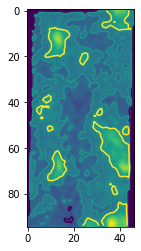

In [5]:
sub_cube_hdu = fits.open('./LAII.sub.fits')
sub_data = sub_cube_hdu[0].data
img = sub_data[1]
img[np.isnan(img)] = 0
print(data.shape)
print(getImgStats(img))
plt.figure()
plt.contour(img,[0.3,0.5,0.7])
plt.imshow(img)
plt.show()

(302, 118, 287)
avg:	0.5195488333702087
std:	0.19963054358959198
min:	0.0
10:	0.372055071592331
25:	0.45458853244781494
50:	0.5208827257156372
75:	0.6043891310691833
90:	0.7309833407402038
99:	1.0348286819457988
max:	1.3599544763565063



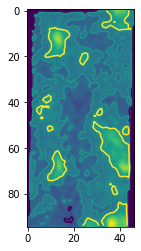

In [6]:
sub_cube_hdu = fits.open('./LAII.sub.fits')
sub_data = sub_cube_hdu[0].data
img = sub_data[1]
img[np.isnan(img)] = 0
print(data.shape)
print(getImgStats(img))
plt.figure()
plt.contour(img,[0.3,0.5,0.7])
plt.imshow(img)
plt.show()

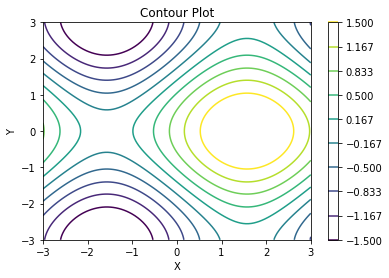

In [7]:
# Generate some example data
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)

# Choose contour levels
contour_levels = np.linspace(-1.5, 1.5, 10)

# Compute contours
contours = plt.contour(X, Y, Z, levels=contour_levels)

# Plot contours
plt.colorbar()  # Add color bar if needed
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot')
plt.show()


In [8]:
!fitsheader model_LAII.fits

# HDU 0 in model_LAII.fits:
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  287                                                  
NAXIS2  =                  118                                                  
NAXIS3  =                  302                                                  
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                585.0 / Pixel coordinate of reference point            
CRPIX2  =                176.0 / Pixel coordinate of reference point            
CRPIX3  =        -8.0783699968 / Pixel coordinate of reference point            
CDELT1  =        -0.0833333333 / [deg] Coordinate increment at reference point  
CDELT2  =         0.0833333333 / [deg] Coordinate increment at reference point  


In [9]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt

## now, overplot CO contour on JWST 770 peak background 
## read in JWST images
jwst_770_hdu = fits.open('%s/multi-wavelength/JWST/ngc6822field2_miri_lv3_f770w_i2d_northerndetection.fits' % data_dir)
jwst_770_image = jwst_770_hdu[0].data ## 2D JWST image
## get WCS (World Coordinate System) so we can have the correct spatial axes labels
wcs = WCS(jwst_770_hdu[0].header)
jwst_770_w_celestial_axes = wcs.celestial

## read in ALMA (CO(2-1)) data
co_hdu = fits.open('%s/multi-wavelength/ALMA/NGC6822_Field2.mom0_northerndetection_VLA_JWST.fits' % data_dir)
co_data = co_hdu[0].data ## 2D image CO image

## set up figure
fig = plt.figure()
## tell subplot the coordinate system
ax0 = plt.subplot(111, projection=jwst_770_w_celestial_axes)
## plot the image
im0 = ax0.imshow(jwst_770_image, cmap = 'inferno', aspect = 'equal', origin = 'lower', vmin=-2, vmax = 15)
## add contours at a level of 5, 10, and 15 data values
ax0.contour(co_data, [5, 10, 15], colors='green', linewidths = 0.5)
ax0.set_title(r'JWST 7.7 $\mu$m \& CO (2-1)')

## color bar
cb = fig.colorbar(im0, ax = ax0, orientation = 'vertical')
cb.ax.minorticks_on()
cb.ax.tick_params(labelsize = 12)
cb.set_label(label = r'MJy/sr', size = 18)

plt.show()

type: name 'data_dir' is not defined